#Download and import Libraries

In [ ]:
!pip install requests tqdm

In [ ]:
import pandas as pd
import re
import numpy as np

In [ ]:
import requests
import json
import csv
import time
import re
from tqdm import tqdm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.4/978.4 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.4 MB/s eta 0:00:00


#Load Dataset

In [ ]:
df = pd.read_excel("texts.xlsx")
df.to_csv("texts.csv", index=False, encoding="utf-8-sig")

In [ ]:
df = pd.read_csv("texts.csv")
df.head(50)

,Thời gian,Nguồn,Tiêu đề,Nội dung
0,2020-01-01,https://baodautu.vn/ngan-hang-khoi-dong-nam-mo...,Ngân hàng khởi động năm mới 2020: Sôi động lên...,Một thương vụ bán vốn giữa ngân hàng nội và đố...
1,2020-01-02,https://www.facebook.com/groups/reviewbatdongs...,Bảng lãi suất cho vay ưu đãi mua nhà tháng 01/...,ACB: 9.5% với thời hạn 12 tháng.
2,2020-01-03,https://vietstock.vn/2020/01/dau-nam-2020-ty-g...,"Đầu năm 2020, tỷ giá USD/VND hạ nhiệt","Trong tuần đầu tiên của năm 2020, tỷ giá trung..."
3,2020-01-04,https://ngaymoionline.com.vn/tp-ha-no-i-chi-cu...,TP Hà Nội: Chi cục THADS huyện Thanh Oai có ...,Trong vụ án “Tranh chấp Hợp đồng tín dụng” giữ...
4,2020-01-05,https://vietnambiz.vn/lai-suat-ngan-hang-acb-m...,Lãi suất ngân hàng ACB mới nhất tháng 1/2020,"Trong tháng 1, mức lãi suất cao nhất tại ngân ..."
5,2020-01-06,https://vietstock.vn/2020/01/lai-suat-tien-gui...,Lãi suất tiền gửi tiết kiệm giữ ổn định những ...,Dù có nhiều điều chỉnh vào những ngày cuối thá...
6,2020-01-07,https://vietnambiz.vn/du-bao-xu-huong-ty-gia-n...,Dự báo xu hướng tỷ giá năm 2020,Tỷ giá năm 2020 được dự báo sẽ tiếp tục duy tr...
7,2020-01-08,https://vietnambiz.vn/su-suy-giam-cua-dong-do-...,Sự suy giảm của đồng đô La Mỹ chỉ mới bắt đầu?,Đồng đô la đã có một tháng mười hai khủng khiế...
8,2020-01-09,https://reatimes.vn/chinh-sach-tien-te-trong-v...,Chính sách tiền tệ trong vòng xoáy bất ổn,"Căng thẳng Trung Đông leo thang, giá vàng tăng..."
9,2020-01-10,https://vnexpress.net/acb-ra-mat-goi-dich-vu-t...,ACB ra mắt gói dịch vụ tài chính dành cho nguồ...,Gói dịch vụ tài chính cho nguồn nhân lực Việt ...


In [ ]:
df.tail(50)

,Thời gian,Nguồn,Tiêu đề,Nội dung
2142,2025-11-12,https://vnexpress.net/gia-vang-moi-nhat-hom-na...,Giá vàng miếng giảm nửa triệu đồng,Các thương hiệu hạ giá bán ra vàng miếng 500.0...
2143,2025-11-13,https://vietnambiz.vn/ty-gia-acb-hom-nay-1311-...,"Tỷ giá ACB hôm nay 13/11: USD, euro tiếp đà tă...","Trưa 13/11, tỷ giá ngoại tệ tại Ngân hàng ACB ..."
2144,2025-11-14,https://markettimes.vn/chuyen-gia-danh-gia-suc...,Chuyên gia đánh giá sức hút của các kênh đầu t...,"Sáng 13/11, Hội thảo “Sức hút của các lớp tài ..."
2145,2025-11-15,https://vov.vn/thi-truong/ty-gia/ty-gia-usd-ho...,Tỷ giá USD hôm nay 15/11: Giá bán USD tự do tă...,"Tỷ giá hôm nay, cập nhật chiều tối thứ Sáu (14..."
2146,2025-11-16,https://www.dnse.com.vn/senses/tin-tuc/dong-ti...,Dòng tiền trở lại giúp thị trường chứng khoán ...,Thị trường chứng khoán Việt Nam tuần 10-14/11 ...
2147,2025-11-17,https://baonghean.vn/gia-vang-hom-nay-17-11-20...,Giá vàng hôm nay 17/11/2025: Bảng giá vàng ACB...,Giá vàng hôm nay 17/11/2025: Giá vàng miếng AC...
2148,2025-11-18,https://vietnambiz.vn/ty-gia-acb-hom-nay-1811-...,"Tỷ giá ACB hôm nay 18/11: USD, bảng Anh đồng l...","Sáng 18/11, thị trường ngoại tệ tại Ngân hàng ..."
2149,2025-11-19,https://www.vnsc.vn/lich-su-gia-co-phieu-acb,Lịch sử giá cổ phiếu ACB (2006 – 2025): Toàn c...,Khi nhắc đến nhóm cổ phiếu ngân hàng tại Việt ...
2150,2025-11-20,https://www.dnse.com.vn/senses/tin-tuc/gia-van...,"Giá vàng hôm nay ngày 20/11: Vàng ""nghỉ ngơi"" ...","Tại thị trường vàng trong nước, sau khi tăng 1..."
2151,2025-11-21,https://doanhnhansaigon.vn/gia-vang-giam-tren-...,"Giá vàng giảm trên thế giới, trong nước vẫn gi...","Sáng 21/11, giá vàng trong nước đi ngang ở vùn..."


In [ ]:
print("Các cột hiện tại trong 'df':")
display(df.columns)

Các cột hiện tại trong 'df':


Index(['Thời gian', 'Nguồn', 'Tiêu đề', 'Nội dung'], dtype='object')

In [ ]:
#đổi tên
df_renamed = df.rename(columns={'Thời gian': 'date', 'Nguồn': 'url', 'Tiêu đề': 'title','Nội dung' : 'content'})

print("Các cột sau khi đổi tên trong 'df_renamed':")
display(df_renamed.columns)

Các cột sau khi đổi tên trong 'df_renamed':


Index(['date', 'url', 'title', 'content'], dtype='object')

In [ ]:
df_renamed['date'] = pd.to_datetime(df_renamed['date'])
df_renamed = df_renamed.set_index('date')

In [ ]:
display(df_renamed.head())

,url,title,content
date,,,
2020-01-01,https://baodautu.vn/ngan-hang-khoi-dong-nam-mo...,Ngân hàng khởi động năm mới 2020: Sôi động lên...,Một thương vụ bán vốn giữa ngân hàng nội và đố...
2020-01-02,https://www.facebook.com/groups/reviewbatdongs...,Bảng lãi suất cho vay ưu đãi mua nhà tháng 01/...,ACB: 9.5% với thời hạn 12 tháng.
2020-01-03,https://vietstock.vn/2020/01/dau-nam-2020-ty-g...,"Đầu năm 2020, tỷ giá USD/VND hạ nhiệt","Trong tuần đầu tiên của năm 2020, tỷ giá trung..."
2020-01-04,https://ngaymoionline.com.vn/tp-ha-no-i-chi-cu...,TP Hà Nội: Chi cục THADS huyện Thanh Oai có ...,Trong vụ án “Tranh chấp Hợp đồng tín dụng” giữ...
2020-01-05,https://vietnambiz.vn/lai-suat-ngan-hang-acb-m...,Lãi suất ngân hàng ACB mới nhất tháng 1/2020,"Trong tháng 1, mức lãi suất cao nhất tại ngân ..."


In [ ]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2020-01-01 to 2025-12-31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2171 non-null   object
 1   title    2167 non-null   object
 2   content  2171 non-null   object
dtypes: object(3)
memory usage: 68.5+ KB


In [ ]:
df_filtered = df_renamed[df_renamed.index <= '2025-10-20'].copy()

In [ ]:
print("Kiểm tra thông tin DataFrame sau khi lọc:")
display(df_filtered.info())

Kiểm tra thông tin DataFrame sau khi lọc:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2120 entries, 2020-01-01 to 2025-10-20
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2120 non-null   object
 1   title    2116 non-null   object
 2   content  2120 non-null   object
dtypes: object(3)
memory usage: 66.2+ KB


None

In [ ]:
df_filtered.head(50)

,url,title,content
date,,,
2020-01-01,https://baodautu.vn/ngan-hang-khoi-dong-nam-mo...,Ngân hàng khởi động năm mới 2020: Sôi động lên...,Một thương vụ bán vốn giữa ngân hàng nội và đố...
2020-01-02,https://www.facebook.com/groups/reviewbatdongs...,Bảng lãi suất cho vay ưu đãi mua nhà tháng 01/...,ACB: 9.5% với thời hạn 12 tháng.
2020-01-03,https://vietstock.vn/2020/01/dau-nam-2020-ty-g...,"Đầu năm 2020, tỷ giá USD/VND hạ nhiệt","Trong tuần đầu tiên của năm 2020, tỷ giá trung..."
2020-01-04,https://ngaymoionline.com.vn/tp-ha-no-i-chi-cu...,TP Hà Nội: Chi cục THADS huyện Thanh Oai có ...,Trong vụ án “Tranh chấp Hợp đồng tín dụng” giữ...
2020-01-05,https://vietnambiz.vn/lai-suat-ngan-hang-acb-m...,Lãi suất ngân hàng ACB mới nhất tháng 1/2020,"Trong tháng 1, mức lãi suất cao nhất tại ngân ..."
2020-01-06,https://vietstock.vn/2020/01/lai-suat-tien-gui...,Lãi suất tiền gửi tiết kiệm giữ ổn định những ...,Dù có nhiều điều chỉnh vào những ngày cuối thá...
2020-01-07,https://vietnambiz.vn/du-bao-xu-huong-ty-gia-n...,Dự báo xu hướng tỷ giá năm 2020,Tỷ giá năm 2020 được dự báo sẽ tiếp tục duy tr...
2020-01-08,https://vietnambiz.vn/su-suy-giam-cua-dong-do-...,Sự suy giảm của đồng đô La Mỹ chỉ mới bắt đầu?,Đồng đô la đã có một tháng mười hai khủng khiế...
2020-01-09,https://reatimes.vn/chinh-sach-tien-te-trong-v...,Chính sách tiền tệ trong vòng xoáy bất ổn,"Căng thẳng Trung Đông leo thang, giá vàng tăng..."


In [ ]:
df_filtered.tail(50)

,url,title,content
date,,,
2025-09-01,https://www.24h.com.vn/kinh-doanh/kinh-te-24h-...,Kinh tế 24h: Kho bạc đã giải ngân hơn 10.400 t...,Ngân hàng làm việc xuyên lễ để kịp chi trả quà...
2025-09-02,https://www.tinnhanhchungkhoan.vn/thi-truong-c...,Thị trường chứng khoán tháng 9: Cơ hội nâng hạ...,"Sau chuỗi tăng hơn 600 điểm từ đáy, VN-Index đ..."
2025-09-03,https://www.dnse.com.vn/senses/tin-tuc/7-co-ph...,"7 cổ phiếu ‘vua’ lọt vào mắt xanh VCBS, một mã...",Công ty Chứng khoán Vietcombank (VCBS) vừa côn...
2025-09-04,https://thanhnien.vn/gia-usd-tang-lai-suat-chi...,"Giá USD tăng, lãi suất chịu áp lực","Tỷ giá căng cứng, lãi suất tiền đồng trên thị ..."
2025-09-05,https://vietnambiz.vn/ty-gia-acb-ngay-59-usd-e...,"Tỷ giá ACB ngày 5/9: USD, euro, yen Nhật, bảng...","Ngày 5/9, tỷ giá tại ngân hàng ACB ghi nhận đà..."
2025-09-06,https://www.dnse.com.vn/senses/tin-tuc/gia-van...,Giá vàng hôm nay ngày 6/9: Vàng tăng chóng mặt...,"Tại thị trường vàng trong nước, sau khi tăng 5..."
2025-09-07,https://vn.investing.com/news/commodities-news...,Thị trường vàng toàn cầu chuẩn bị đón cuộc “cá...,Hội đồng Vàng Thế giới sẽ thử nghiệm cơ chế PG...
2025-09-08,https://vietnambiz.vn/ty-gia-vietinbank-hom-na...,Tỷ giá VietinBank hôm nay 8/9 USD giảm chiều b...,"Khảo sát ngày 8/9, tỷ giá ngân hàng VietinBank..."
2025-09-09,https://cafef.vn/giu-on-dinh-lai-suat-ti-gia-1...,"Giữ ổn định lãi suất, tỉ giá","Thủ tướng yêu cầu giữ ổn định lãi suất, tăng x..."


In [ ]:
# Rows thiếu title
print("Rows thiếu title:")
display(df_filtered[df_filtered['title'].isna()])

# Rows thiếu content
print("\nRows thiếu content:")
display(df_filtered[df_filtered['content'].isna()])

Rows thiếu title:


,url,title,content
date,,,
2020-10-12,https://vietnambiz.vn/loi-nhuan-nhieu-ngan-han...,NaN,"Theo SSI Research, lợi nhuận trước thuế trong ..."
2022-07-10,https://laodong.vn/tien-te-dau-tu/gia-usd-cho-...,NaN,"Giá USD chợ đen tăng vọt mốc 24.000 đồng, giá ..."
2023-08-27,https://laodong.vn/infographic/cap-nhat-gia-va...,NaN,Cập nhật giá vàng hôm nay 27.8: Trong cuộc khả...
2024-08-24,https://nhandan.vn/gia-vang-ngay-248-vang-nhan...,NaN,Giá vàng thế giới hôm nay (24/8) tăng mạnh lên...



Rows thiếu content:


,url,title,content
date,,,


THỐNG KÊ SỐ TIN TỨC MỖI NGÀY:
count    2120.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
dtype: float64

Min: 1 tin/ngày
Max: 1 tin/ngày
Mean: 1.0 tin/ngày

Ngày có nhiều tin nhất:
2020-01-01    1
2020-01-02    1
2020-01-03    1
2020-01-04    1
2020-01-05    1
2020-01-06    1
2020-01-07    1
2020-01-08    1
2020-01-09    1
2020-01-10    1
dtype: int64

Ngày chỉ có 1 tin:
2120 ngày


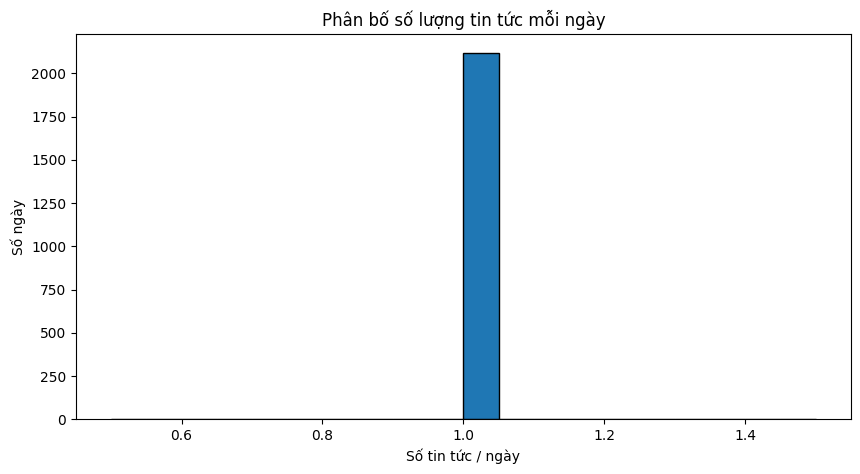

In [ ]:
# Đếm số tin tức mỗi ngày
news_per_day = df_filtered.groupby(df_filtered.index.date).size()

print("THỐNG KÊ SỐ TIN TỨC MỖI NGÀY:")
print(news_per_day.describe())

print(f"\nMin: {news_per_day.min()} tin/ngày")
print(f"Max: {news_per_day.max()} tin/ngày")
print(f"Mean: {news_per_day.mean():.1f} tin/ngày")

# Ngày có nhiều tin nhất
print(f"\nNgày có nhiều tin nhất:")
print(news_per_day.nlargest(10))

# Ngày có ít tin nhất
print(f"\nNgày chỉ có 1 tin:")
print(f"{(news_per_day == 1).sum()} ngày")

# Histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(news_per_day, bins=20, edgecolor='black')
plt.xlabel('Số tin tức / ngày')
plt.ylabel('Số ngày')
plt.title('Phân bố số lượng tin tức mỗi ngày')
plt.show()

In [ ]:
# Tạo DataFrame thống kê
summary = pd.DataFrame({
    'news_count': news_per_day
})

print(f"Tổng số ngày có tin: {len(news_per_day)}")
print(f"Tổng số tin tức: {news_per_day.sum()}")
print(f"\nPhân bố:")
print(f"  - Ngày có 1 tin:   {(news_per_day == 1).sum()}")
print(f"  - Ngày có 2-5 tin: {((news_per_day >= 2) & (news_per_day <= 5)).sum()}")
print(f"  - Ngày có >5 tin:  {(news_per_day > 5).sum()}")

Tổng số ngày có tin: 2120
Tổng số tin tức: 2120

Phân bố:
  - Ngày có 1 tin:   2120
  - Ngày có 2-5 tin: 0
  - Ngày có >5 tin:  0


#ĐẾM TOKENS CỦA CỘT CONTENT

In [ ]:
from transformers import AutoTokenizer
import pandas as pd

# Load tokenizers
print("Loading tokenizers...")
tok_phobert = AutoTokenizer.from_pretrained("vinai/phobert-base")
tok_vn_embed = AutoTokenizer.from_pretrained("AITeamVN/Vietnamese_Embedding")
tok_vn_doc = AutoTokenizer.from_pretrained("dangvantuan/vietnamese-document-embedding", trust_remote_code=True)

# Đếm tokens
df_filtered['tok_phobert'] = df_filtered['content'].apply(lambda x: len(tok_phobert.encode(str(x))) if pd.notna(x) else 0)
df_filtered['tok_vn_embed'] = df_filtered['content'].apply(lambda x: len(tok_vn_embed.encode(str(x))) if pd.notna(x) else 0)
df_filtered['tok_vn_doc'] = df_filtered['content'].apply(lambda x: len(tok_vn_doc.encode(str(x))) if pd.notna(x) else 0)

# Thống kê
print("\n" + "="*60)
print("MODEL                          | MAX  | % FIT  | MAX IN DATA")
print("="*60)
print(f"PhoBERT-base/large             | 256  | {(df_filtered['tok_phobert']<=256).mean()*100:5.1f}% | {df_filtered['tok_phobert'].max():,}")
print(f"Vietnamese_Embedding (AITeamVN)| 2048 | {(df_filtered['tok_vn_embed']<=2048).mean()*100:5.1f}% | {df_filtered['tok_vn_embed'].max():,}")
print(f"vietnamese-document-embedding  | 8192 | {(df_filtered['tok_vn_doc']<=8192).mean()*100:5.1f}% | {df_filtered['tok_vn_doc'].max():,}")
print("="*60)

Loading tokenizers...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]


MODEL                          | MAX  | % FIT  | MAX IN DATA
PhoBERT-base/large             | 256  |  99.6% | 530
Vietnamese_Embedding (AITeamVN)| 2048 | 100.0% | 526
vietnamese-document-embedding  | 8192 | 100.0% | 526


# 📊 Báo Cáo Phân Tích Token Count

## Kết Quả Thống Kê
```
============================================================
MODEL                          | MAX  | % FIT  | MAX IN DATA
============================================================
PhoBERT-base/large             | 256  |  99.6% | 530
Vietnamese_Embedding (AITeamVN)| 2048 | 100.0% | 526
vietnamese-document-embedding  | 8192 | 100.0% | 526
============================================================
```

---

## 1. Giải Thích Các Cột

| Cột | Ý nghĩa |
|-----|---------|
| **MODEL** | Tên model embedding được đánh giá |
| **MAX** | Số tokens tối đa mà model có thể xử lý trong 1 lần |
| **% FIT** | Phần trăm văn bản trong dataset nằm trong giới hạn MAX |
| **MAX IN DATA** | Số tokens của văn bản dài nhất trong dataset |

---

## 2. Phân Tích Từng Model

### 2.1. PhoBERT-base/large

| Thông số | Giá trị |
|----------|---------|
| Giới hạn MAX | 256 tokens |
| % FIT | 99.6% |
| MAX IN DATA | 530 tokens |

**Giải thích:**
- ✅ **99.6%** văn bản có độ dài ≤ 256 tokens → Giữ nguyên, không mất thông tin
- ❌ **0.4%** văn bản có độ dài > 256 tokens → Bị **truncate (cắt bỏ)** phần vượt quá

**Hậu quả với 0.4% văn bản bị cắt:**
```
Văn bản 530 tokens:  [1] [2] [3] ... [256] | [257] [258] ... [530]
                                      ↑
                                 Cắt tại đây
                         
Giữ lại: [1]...[256]   → 48% nội dung
Mất đi:  [257]...[530] → 52% nội dung
```

---

### 2.2. Vietnamese_Embedding (AITeamVN)

| Thông số | Giá trị |
|----------|---------|
| Giới hạn MAX | 2048 tokens |
| % FIT | 100% |
| MAX IN DATA | 526 tokens |

**Giải thích:**
- ✅ **100%** văn bản nằm trong giới hạn
- ✅ Văn bản dài nhất (526) < Giới hạn (2048)
- ✅ **Không mất thông tin**

---

### 2.3. vietnamese-document-embedding

| Thông số | Giá trị |
|----------|---------|
| Giới hạn MAX | 8192 tokens |
| % FIT | 100% |
| MAX IN DATA | 526 tokens |

**Giải thích:**
- ✅ **100%** văn bản nằm trong giới hạn
- ✅ **Không mất thông tin**

---

## 3. Tại Sao MAX IN DATA Khác Nhau (530 vs 526)?

Mỗi tokenizer tách từ khác nhau:

| Câu ví dụ | PhoBERT | Vietnamese_Embedding |
|-----------|---------|---------------------|
| "Tăng 2.5%" | ["Tăng", "2", ".", "5", "%"] = 5 tokens | ["Tăng", "2.5%"] = 2 tokens |

→ PhoBERT tách nhỏ hơn → cùng văn bản nhưng nhiều tokens hơn

---

## 4. So Sánh Tổng Quan

| Tiêu chí | PhoBERT | Vietnamese_Embedding | vn-document-embedding |
|----------|:-------:|:--------------------:|:---------------------:|
| Max tokens | 256 | 2048 | 8192 |
| Output dim | 768/1024 | 1024 | 768 |
| % Data fit | 99.6% | **100%** | **100%** |
| Mất thông tin? | Có (0.4%) | **Không** | **Không** |

#Preprocessing

- Loại bỏ ký tự lỗi: \n, \t
- Loại bỏ emoji (nếu có)
- Chuẩn hóa khoảng trắng
- Thay kí tự HTML (&#39;, &quot;, &amp;, …)
- Giữ nguyên ký tự quan trọng của kinh tế: % . , / -
- Không xóa dấu tiếng Việt
- Không xóa số

In [ ]:
!pip install wordcloud

In [ ]:
import re
import html
import pandas as pd

def minimal_clean(text):
    """Preprocessing tối thiểu cho model embedding hiện đại"""
    if pd.isna(text):
        return ""

    text = str(text)

    # 1. Giải mã HTML entities
    text = html.unescape(text)

    # 2. Bỏ HTML tags
    text = re.sub(r'<[^>]+>', ' ', text)

    # 3. Bỏ URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)

    # 4. Bỏ emoji và ký tự lạ (giữ lại chữ, số, dấu câu cơ bản, tiếng Việt)
    text = re.sub(
        r"[^0-9a-zA-ZÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬÉÈẺẼẸÊẾỀỂỄỆ"
        r"ÍÌỈĨỊÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÚÙỦŨỤƯỨỪỬỮỰÝỲỶỸỴĐ"
        r"áàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệ"
        r"íìỉĩịóòỏõọôốồổỗộơớờởỡợúùủũụưứừửữựýỳỷỹỵđ"
        r"%\.\,\/\-\+\$₫\(\)\:\!\?\s]",
        " ",
        text
    )

    # 5. Chuẩn hóa khoảng trắng
    text = ' '.join(text.split())

    return text

In [ ]:
# Test
text = "Cổ phiếu VNM tăng +5.2%!\nHPG giảm -2% (về mức $85). P/E: 15.3"

print("GỐC:", repr(text))
print("SAU:", minimal_clean(text))

GỐC: 'Cổ phiếu VNM tăng +5.2%!\nHPG giảm -2% (về mức $85). P/E: 15.3'
SAU: Cổ phiếu VNM tăng +5.2%! HPG giảm -2% (về mức $85). P/E: 15.3


In [ ]:
df_filtered.head()

,url,title,content,tok_phobert,tok_vn_embed,tok_vn_doc
date,,,,,,
2020-01-01,https://baodautu.vn/ngan-hang-khoi-dong-nam-mo...,Ngân hàng khởi động năm mới 2020: Sôi động lên...,Một thương vụ bán vốn giữa ngân hàng nội và đố...,65,65,65
2020-01-02,https://www.facebook.com/groups/reviewbatdongs...,Bảng lãi suất cho vay ưu đãi mua nhà tháng 01/...,ACB: 9.5% với thời hạn 12 tháng.,13,13,13
2020-01-03,https://vietstock.vn/2020/01/dau-nam-2020-ty-g...,"Đầu năm 2020, tỷ giá USD/VND hạ nhiệt","Trong tuần đầu tiên của năm 2020, tỷ giá trung...",41,38,38
2020-01-04,https://ngaymoionline.com.vn/tp-ha-no-i-chi-cu...,TP Hà Nội: Chi cục THADS huyện Thanh Oai có ...,Trong vụ án “Tranh chấp Hợp đồng tín dụng” giữ...,120,117,117
2020-01-05,https://vietnambiz.vn/lai-suat-ngan-hang-acb-m...,Lãi suất ngân hàng ACB mới nhất tháng 1/2020,"Trong tháng 1, mức lãi suất cao nhất tại ngân ...",46,48,48


In [ ]:
# Áp dụng
df_filtered['content_clean'] = df_filtered['content'].apply(minimal_clean)

In [ ]:
df_filtered

,url,title,content,tok_phobert,tok_vn_embed,tok_vn_doc,content_clean
date,,,,,,,
2020-01-01,https://baodautu.vn/ngan-hang-khoi-dong-nam-mo...,Ngân hàng khởi động năm mới 2020: Sôi động lên...,Một thương vụ bán vốn giữa ngân hàng nội và đố...,65,65,65,Một thương vụ bán vốn giữa ngân hàng nội và đố...
2020-01-02,https://www.facebook.com/groups/reviewbatdongs...,Bảng lãi suất cho vay ưu đãi mua nhà tháng 01/...,ACB: 9.5% với thời hạn 12 tháng.,13,13,13,ACB: 9.5% với thời hạn 12 tháng.
2020-01-03,https://vietstock.vn/2020/01/dau-nam-2020-ty-g...,"Đầu năm 2020, tỷ giá USD/VND hạ nhiệt","Trong tuần đầu tiên của năm 2020, tỷ giá trung...",41,38,38,"Trong tuần đầu tiên của năm 2020, tỷ giá trung..."
2020-01-04,https://ngaymoionline.com.vn/tp-ha-no-i-chi-cu...,TP Hà Nội: Chi cục THADS huyện Thanh Oai có ...,Trong vụ án “Tranh chấp Hợp đồng tín dụng” giữ...,120,117,117,Trong vụ án Tranh chấp Hợp đồng tín dụng giữa ...
2020-01-05,https://vietnambiz.vn/lai-suat-ngan-hang-acb-m...,Lãi suất ngân hàng ACB mới nhất tháng 1/2020,"Trong tháng 1, mức lãi suất cao nhất tại ngân ...",46,48,48,"Trong tháng 1, mức lãi suất cao nhất tại ngân ..."
...,...,...,...,...,...,...,...
2025-10-16,https://baonghean.vn/gia-vang-hom-nay-16-10-20...,Giá vàng hôm nay 16/10/2025: Bảng giá vàng ACB...,Giá vàng hôm nay 16/10/2025: Giá vàng miếng SJ...,42,45,45,Giá vàng hôm nay 16/10/2025: Giá vàng miếng SJ...
2025-10-17,https://www.tinnhanhchungkhoan.vn/gia-vang-hom...,Giá vàng hôm nay ngày 17/10: Vàng tăng thêm tr...,Giá vàng hôm nay ngày 17/10: Vàng tăng thêm tr...,21,22,22,Giá vàng hôm nay ngày 17/10: Vàng tăng thêm tr...
2025-10-18,https://laodong.vn/tien-te-dau-tu/nhin-lai-tua...,Nhìn lại tuần bùng nổ của giá vàng,"Giá vàng tuần qua biến động mạnh, liên tục phá...",28,28,28,"Giá vàng tuần qua biến động mạnh, liên tục phá..."


In [ ]:
# Cách 1: Đếm số NaN
print(f"Số NaN: {df_filtered['content_clean'].isna().sum()}")

# Cách 2: Xem chi tiết
print(f"Tổng rows: {len(df_filtered)}")
print(f"Non-null:  {df_filtered['content_clean'].notna().sum()}")
print(f"NaN:       {df_filtered['content_clean'].isna().sum()}")

# Cách 3: Xem rows bị NaN
df_filtered[df_filtered['content_clean'].isna()]

Số NaN: 0
Tổng rows: 2120
Non-null:  2120
NaN:       0


,url,title,content,tok_phobert,tok_vn_embed,tok_vn_doc,content_clean
date,,,,,,,


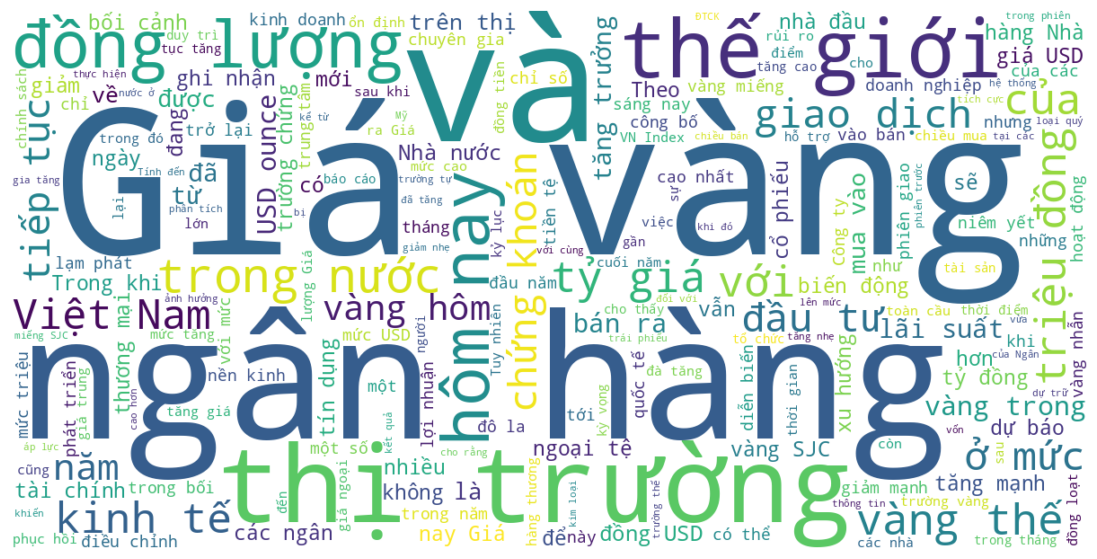

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Giả sử cột đã là content_clean
text = " ".join(df_filtered["content_clean"].astype(str).tolist())
len(text)

wc = WordCloud(
    width=1200,
    height=600,
    background_color="white"   # màu nền, còn màu chữ để mặc định
).generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

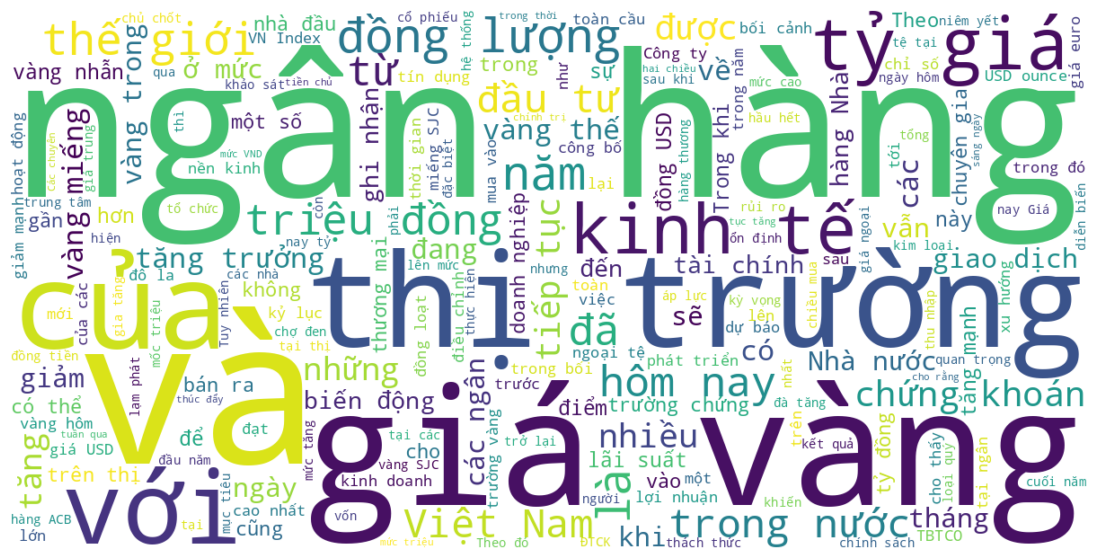

In [ ]:
mask_2024 = df_filtered.index >= "2024-01-01"
text_2024 = " ".join(df_filtered.loc[mask_2024, "content_clean"].astype(str))

wc_2024 = WordCloud(
    width=1200,
    height=600,
    background_color="white"
).generate(text_2024)

plt.figure(figsize=(14, 7))
plt.imshow(wc_2024, interpolation="bilinear")
plt.axis("off")
plt.show()

#Download preprecessing dataset

In [ ]:
df_filtered.to_csv("collected_news_preprocess.csv", index=True, encoding="utf-8-sig")

In [ ]:
import pandas as pd

# 1. Tạo dãy tất cả các ngày trong khoảng thời gian
start_date = '2020-01-01'
end_date = '2025-10-20'
all_dates = pd.date_range(start=start_date, end=end_date, freq='D')

print(f"Tổng số ngày từ {start_date} đến {end_date}: {len(all_dates)}")

# 2. Lấy các ngày có trong dataset (từ index)
news_dates = pd.to_datetime(df_filtered.index).unique()

print(f"Số ngày có tin tức trong dataset: {len(news_dates)}")

# 3. Tìm các ngày bị thiếu
missing_dates = set(all_dates) - set(news_dates)
missing_dates = sorted(missing_dates)

print(f"\n📌 Số ngày bị thiếu: {len(missing_dates)}")

# 4. Hiển thị các ngày bị thiếu
if missing_dates:
    print("\n🔍 Danh sách ngày bị thiếu:")
    for date in missing_dates[:20]:  # Hiển thị 20 ngày đầu
        print(f"  - {date.strftime('%Y-%m-%d')} ({date.strftime('%A')})")

    if len(missing_dates) > 20:
        print(f"  ... và {len(missing_dates) - 20} ngày khác")
else:
    print("\n✅ Không có ngày nào bị thiếu!")

Tổng số ngày từ 2020-01-01 đến 2025-10-20: 2120
Số ngày có tin tức trong dataset: 2120

📌 Số ngày bị thiếu: 0

✅ Không có ngày nào bị thiếu!
